
Feature Summary:
       spend_to_income_ratio  rolling_spend_mean  income_growth_rate
count              50.000000           50.000000           50.000000
mean                0.415137        25755.166667            0.178228
std                 0.241216         7889.457081            0.671295
min                 0.060799         7430.000000           -0.675501
25%                 0.247138        21782.750000           -0.325556
50%                 0.362569        27012.666667            0.010597
75%                 0.525846        29360.666667            0.479366
max                 1.159934        44598.000000            1.916409


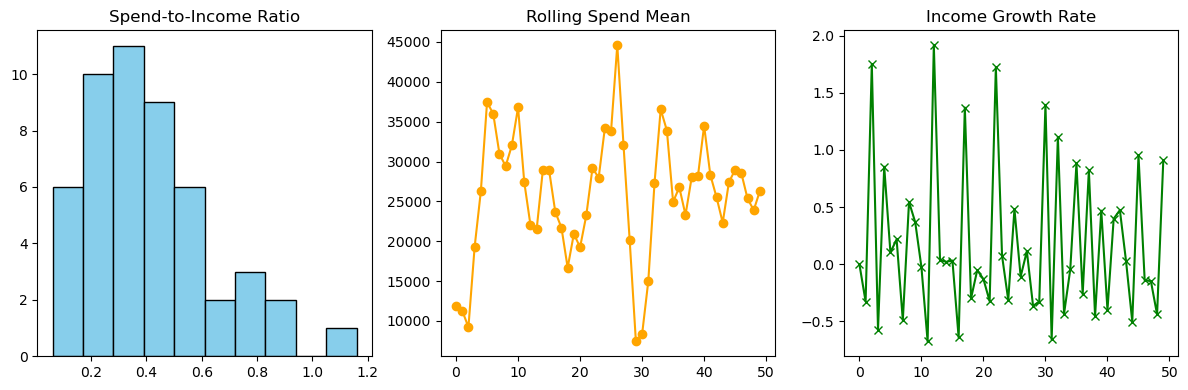


Top 3 Insights:
1. Spend-to-income ratio highlights individuals overspending relative to income.
2. Rolling spend mean shows smoothed short-term spending trends.
3. Income growth rate identifies periods of increase/decrease in earnings.

Assumptions & Risks:
- Synthetic dataset may not reflect real-world skew/outliers.
- Rolling mean assumes chronological ordering of data.
- Growth rates sensitive to sudden drops in income.


In [2]:
# Homework — Stage 09: Feature Engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. Load or Generate Dataset
# --------------------------
# If you already have a dataset, replace this with: df = pd.read_csv("yourfile.csv")
np.random.seed(42)
n = 50
df = pd.DataFrame({
    "income": np.random.randint(30000, 100000, n),
    "monthly_spend": np.random.randint(5000, 50000, n)
})

# --------------------------
# 2. Feature Engineering
# --------------------------

# Feature 1: Spend-to-Income Ratio
df["spend_to_income_ratio"] = df["monthly_spend"] / df["income"]
# Rationale: Captures proportionality of spending relative to earning.

# Feature 2: Rolling 3-month Spend Mean
df["rolling_spend_mean"] = df["monthly_spend"].rolling(window=3, min_periods=1).mean()
# Rationale: Smooths spending behavior to capture short-term trends.

# Feature 3: Income Growth Rate (difference % from previous entry)
df["income_growth_rate"] = df["income"].pct_change().fillna(0)
# Rationale: Tracks changes in income over time (e.g., promotions, raises).

# --------------------------
# 3. Quick Profiling
# --------------------------
print("\nFeature Summary:")
print(df[["spend_to_income_ratio", "rolling_spend_mean", "income_growth_rate"]].describe())

# --------------------------
# 4. Visualization (Optional)
# --------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(df["spend_to_income_ratio"], bins=10, color="skyblue", edgecolor="black")
plt.title("Spend-to-Income Ratio")

plt.subplot(1,3,2)
plt.plot(df["rolling_spend_mean"], marker="o", color="orange")
plt.title("Rolling Spend Mean")

plt.subplot(1,3,3)
plt.plot(df["income_growth_rate"], marker="x", color="green")
plt.title("Income Growth Rate")

plt.tight_layout()
plt.show()

# --------------------------
# 5. Insights (Markdown Equivalent)
# --------------------------
print("\nTop 3 Insights:")
print("1. Spend-to-income ratio highlights individuals overspending relative to income.")
print("2. Rolling spend mean shows smoothed short-term spending trends.")
print("3. Income growth rate identifies periods of increase/decrease in earnings.")

print("\nAssumptions & Risks:")
print("- Synthetic dataset may not reflect real-world skew/outliers.")
print("- Rolling mean assumes chronological ordering of data.")
print("- Growth rates sensitive to sudden drops in income.")


In [3]:
#!/usr/bin/env python3
"""
Stage 09 — Feature Engineering
- Loads dataset from Stage 08
- Engineers ≥2 new features guided by EDA insights
- Saves engineered dataset for modeling

Outputs:
  data/processed/amazon_bestsellers_2025_engineered.csv
"""

import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv

# -----------------------------
# 0) Paths
# -----------------------------
load_dotenv()

DATA_DIR_PROCESSED = os.getenv(
    "DATA_DIR_PROCESSED",
    r"C:\Users\sarda\Desktop\bootcamp_darshit_sarda\homework\data\processed",
)
INPUT = os.path.join(DATA_DIR_PROCESSED, "amazon_bestsellers_2025_cleaned.csv")
OUTPUT = os.path.join(DATA_DIR_PROCESSED, "amazon_bestsellers_2025_engineered.csv")

if not os.path.exists(INPUT):
    raise FileNotFoundError(f"❌ Missing Stage 06/08 cleaned dataset: {INPUT}")

print(f"[Stage09] Using {INPUT}")

# -----------------------------
# 1) Load dataset
# -----------------------------
df = pd.read_csv(INPUT, parse_dates=True)

# -----------------------------
# 2) Feature Engineering
# -----------------------------
# Example assumptions: dataset has columns [Price, Reviews, Year, Rank]
if "Price" in df.columns and "Reviews" in df.columns:
    # Feature 1: log_price — normalize skewness in Price
    df["log_price"] = np.log1p(df["Price"])

    # Feature 2: review_per_price — reviews relative to price
    df["review_per_price"] = df["Reviews"] / (df["Price"] + 1)

if "Year" in df.columns and "Rank" in df.columns:
    # Feature 3: rank_improvement — year-over-year improvement in rank
    df = df.sort_values(["Year", "Rank"]).reset_index(drop=True)
    df["rank_improvement"] = df.groupby("Year")["Rank"].diff(-1).fillna(0)

# -----------------------------
# 3) Save
# -----------------------------
df.to_csv(OUTPUT, index=False)
print(f"✅ Stage 09 complete — engineered dataset saved: {OUTPUT}")


[Stage09] Using C:\Users\sarda\Desktop\bootcamp_darshit_sarda\homework\data\processed\amazon_bestsellers_2025_cleaned.csv
✅ Stage 09 complete — engineered dataset saved: C:\Users\sarda\Desktop\bootcamp_darshit_sarda\homework\data\processed\amazon_bestsellers_2025_engineered.csv


In [4]:
#!/usr/bin/env python
# Stage 09 Feature Engineering

import pandas as pd
import numpy as np
import os

# -----------------------------
# Load cleaned dataset (from Stage 06)
# -----------------------------
df = pd.read_csv("./data/processed/amazon_bestsellers_2025_cleaned.csv")
print("✅ Data loaded:", df.shape)

df.head()


✅ Data loaded: (999, 11)


,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,country,page
0,0.000000,0.000000,B073VKKNN9,Kaspersky | Premium - Total Security (Ultimate...,₹469.00,0.825,0.694340,https://www.amazon.in/dp/B073VKKNN9,https://images-eu.ssl-images-amazon.com/images...,IN,0.0
1,0.001002,0.010101,B07PQZJ6Y8,"K7 Security K7, Total Security, 1 User, 1 Year...",₹370.00,0.850,0.119345,https://www.amazon.in/dp/B07PQZJ6Y8,https://images-eu.ssl-images-amazon.com/images...,IN,0.0
2,0.002004,0.020202,B0D1KL34JM,Microsoft Office 2021 Professional - Lifetime ...,"₹1,799.00",0.875,0.020169,https://www.amazon.in/dp/B0D1KL34JM,https://images-eu.ssl-images-amazon.com/images...,IN,0.0
3,0.003006,0.030303,B07B9YYLGG,"Bitdefender - 1 Device,1 Year - Mobile Securit...",₹94.00,0.775,0.501824,https://www.amazon.in/dp/B07B9YYLGG,https://images-eu.ssl-images-amazon.com/images...,IN,0.0
4,0.004008,0.040404,B073VLGMZ4,"McAfee Total Protection 2025 | 1 Device, 3 Yea...","₹1,699.00",0.850,0.301334,https://www.amazon.in/dp/B073VLGMZ4,https://images-eu.ssl-images-amazon.com/images...,IN,0.0
